In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def f(x):
    return 3*x**2 -4*x +5

In [3]:
f(3.0)

20.0

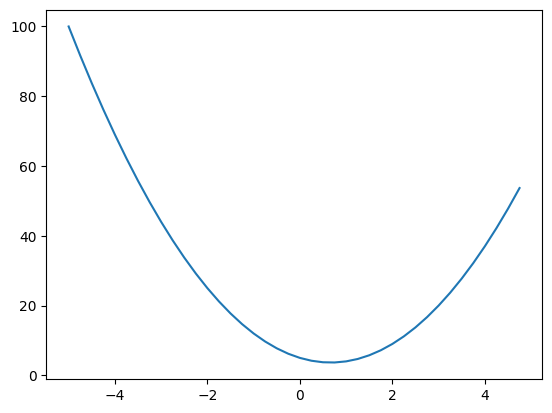

In [4]:
xs = np.arange(-5,5,0.25)
ys = f(xs)

plt.plot(xs, ys)

In [5]:
h = 0.0000001
x = 2/3
(f(x+h)-f(x))/h

2.9753977059954195e-07

In [6]:
a = 2.0
b = -3.0
c = 10.0
d = a*b +c
print(d)

4.0


In [2]:

h = 0.0001

a = 2.0
b = -3.0
c = 10.0

d1 = a*b +c
c+=h
d2 = a*b +c

print("d1",d1)
print("d2",d2)

print('slope', (d2-d1)/h)

d1 4.0
d2 4.0001
slope 0.9999999999976694


In [ ]:
class Value:

    def __init__(self, data, _children=(),_op='',label = ""):
        self.data = data
        self.grad = 0.0
        self._backward = lambda: None  # placeholder for backward method
        self._prev = set(_children)
        self._op = _op
        self.label = label

    def __repr__(self):
        return f"Value(data={self.data})"
    
    def __add__(self, other):
        other = other if isinstance(other, Value) else Value(other)
        out = Value(self.data + other.data , (self,other),"+")
        
        def _backward():
            self.grad += 1.0 * out.grad
            other.grad += 1.0 * out.grad

        out._backward = _backward
        return out
    
    def __mul__(self, other):
        other = other if isinstance(other, Value) else Value(other)
        out = Value(self.data * other.data ,(self,other),"*")
        
        def _backward():
            self.grad += other.data* out.grad
            other.grad += self.data * out.grad

        out._backward = _backward
        return out
    
    def __pow__(self, other):
        assert isinstance(other, (int, float)), "only supporting int/float powers for now"
        out = Value(self.data**other, (self,), f'**{other}')

        def _backward():
            self.grad += other * (self.data ** (other - 1)) * out.grad
        out._backward = _backward

        return out
  
    
    def __rmul__(self, other):
        return self * other
    
    def __truediv__(self, other):
        return self * other**-1
    
    def __neg__(self):
        return self * -1
    
    def __sub__(self, other): # self - other
        return self + (-other)

    def __radd__(self, other): # other + self
        return self + other
    

    
    def tanh(self):
        x = self.data
        t = (math.exp(2*x) - 1) / (math.exp(2*x) + 1)
        out = Value(t, (self,), "tanh")
        def _backward():
            self.grad += (1- t**2) * out.grad
        
        out._backward = _backward

        return out
    
    def exp(self):
        x = self.data
        out = Value(math.exp(x),(self,), "exp")

        def _backward():
            self.grad += out.data * out.grad

        out._backward = _backward
                    
        return out
    
    def backward(self):
        topo = []
        visited = set()
        def build_topo(v):
            if v not in visited:
                visited.add(v)
                for child in v._prev:
                    build_topo(child)
                topo.append(v)
        
        build_topo(self)

        self.grad = 1.0

        for node in reversed(topo):
            node._backward()

In [117]:
a = Value(2.0)
b = Value(3.0)
a - b

Value(data=-1.0)

In [8]:
from graphviz import Digraph

def trace(root):
  # builds a set of all nodes and edges in a graph
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v._prev:
        edges.add((child, v))
        build(child)
  build(root)
  return nodes, edges

def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right
  
  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    # for any value in the graph, create a rectangular ('record') node for it
    # dot.node(name = uid, label = "{ %s | data %.4f | grad %.4f }" % (n.label, n.data, n.grad), shape='record')
    dot.node(name = uid, label = "{%s | data %.4f | grad %.4f }" % (n.label,n.data,n.grad), shape='record')

    if n._op:
      # if this value is a result of some operation, create an op node for it
      dot.node(name = uid + n._op, label = n._op)
      # and connect this node to it
      dot.edge(uid + n._op, uid)

  for n1, n2 in edges:
    # connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)

  return dot

we already know 

L = d*f
dL/dd = ?

dL w.r.t to dd we are gonna increment d with h

(f(x+h)-f(x))/h
((d+h)*f)-(d*f)/h
d*f+h*f-d*f/h
h*f/h
f

dL/dd = f  (f = -2.0)
dL/dd = -2.0

same for dL/df would be d which equals to 4.000
dL/df = 4.00

dd/dc = ?


d = c+e

(f(x+h)-f(x))/h
so w.r.t to c 
((c+h+e) -(c+e))/h
c+h-e-c-e/h
1.0

dd/dc = 1.0

same for dd/de as well dd/de = 1.0


chain rule of derivate dL/dc = (dL/dd)*(dd/dc)
chain rule of derivate dL/de = (dL/dd)*(dd/de)

dL/dc = -2.0*1.0 = -2.0
dL/de = -2.0*1.0 = -2.0



dL/de = -2.0

e = a+b

de/da = b (refer above hoe to derive)
de/da = -3.0

dL/da = (dL/de)*(de/da)
dL/da = -2.0*-3.0
dL/da = 6.0

de/da = a (refer above hoe to derive)
de/da = 2

dL/db = (dL/de)*(de/db)
dL/db = -2.0*2.0
dL/db = -4.0


In [118]:

# inputs x1,x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')
# weights w1,w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
# bias of the neuron
b = Value(6.8813735870195432, label='b')
# x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'
o = n.tanh(); o.label = 'o'
o.backward()

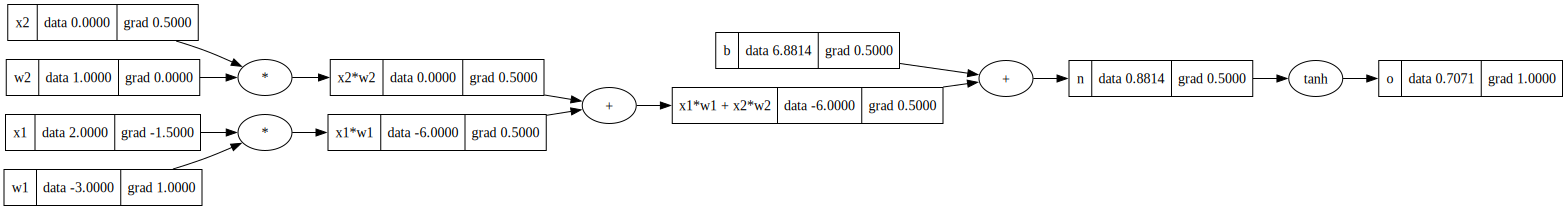

In [119]:
draw_dot(o)

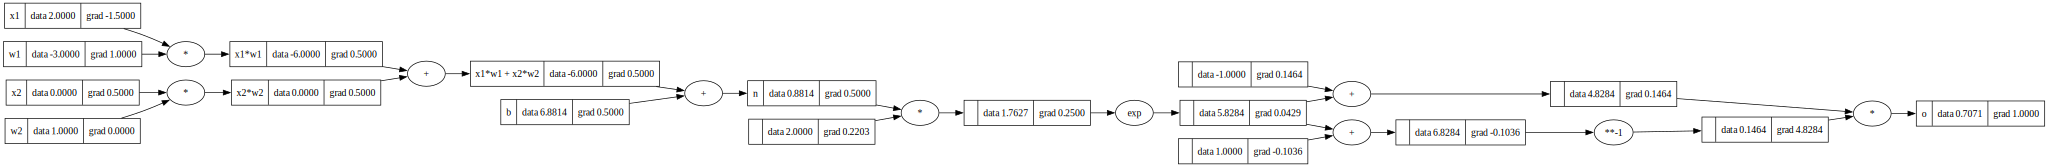

In [128]:

# inputs x1,x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')
# weights w1,w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
# bias of the neuron
b = Value(6.8813735870195432, label='b')
# x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'

e = (2*n).exp()
o = (e - 1) / (e + 1)
o.label = 'o'
o.backward()
draw_dot(o)

o = tanh(x)

do/dn = 1-tanh(x)**2 (from wikipedia)

do/dn = 1-o.data**2 (as we know o.data we place that value here)

"+" makes derivative flow equally
